## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha
* Ver los fin de semanas
* Cuantos días pasaron desde el ultimo feriado y cuanto falta para el siguiente (?)
* Ver outliers en los feriados (o en los días)
* Maximos y minimos en los user_activities
* Diferenciar por pais

## Carga de librerías

In [67]:
# Probar con arbol con poda
# Probar con arbol sin poda pero corto
# Probar voting
# Probar varios KFolds en el de stacking

#Agregamos librerias a utilizar
import keras as keras
import pandas as pd
import xgboost as xgb
# import sklearn as sk
import numpy as np
from datetime import datetime

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#modelos y métricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, cross_validate
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', 40)

# import warnings
# warnings.simplefilter("ignore")

## Visualización de datos

In [68]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [69]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

### Primeros vistazos al dataset original

In [70]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


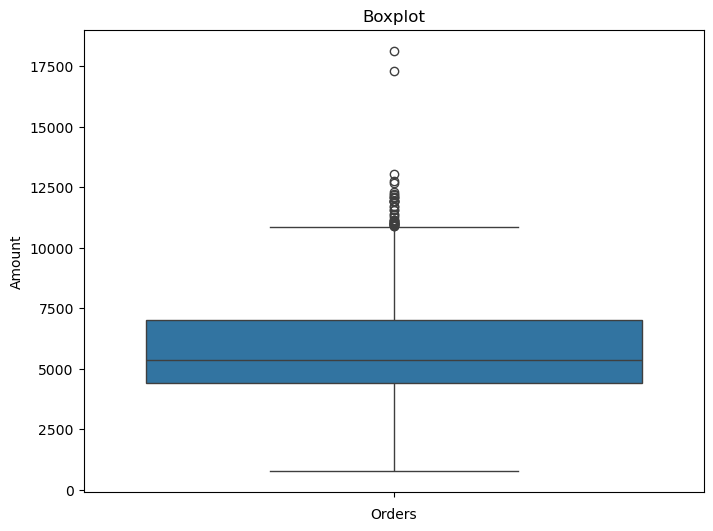

In [71]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [72]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [73]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [74]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [75]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [76]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor información -más precisa y más útil- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

#### Dataset limpio (para testear)

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [77]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change", "id"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

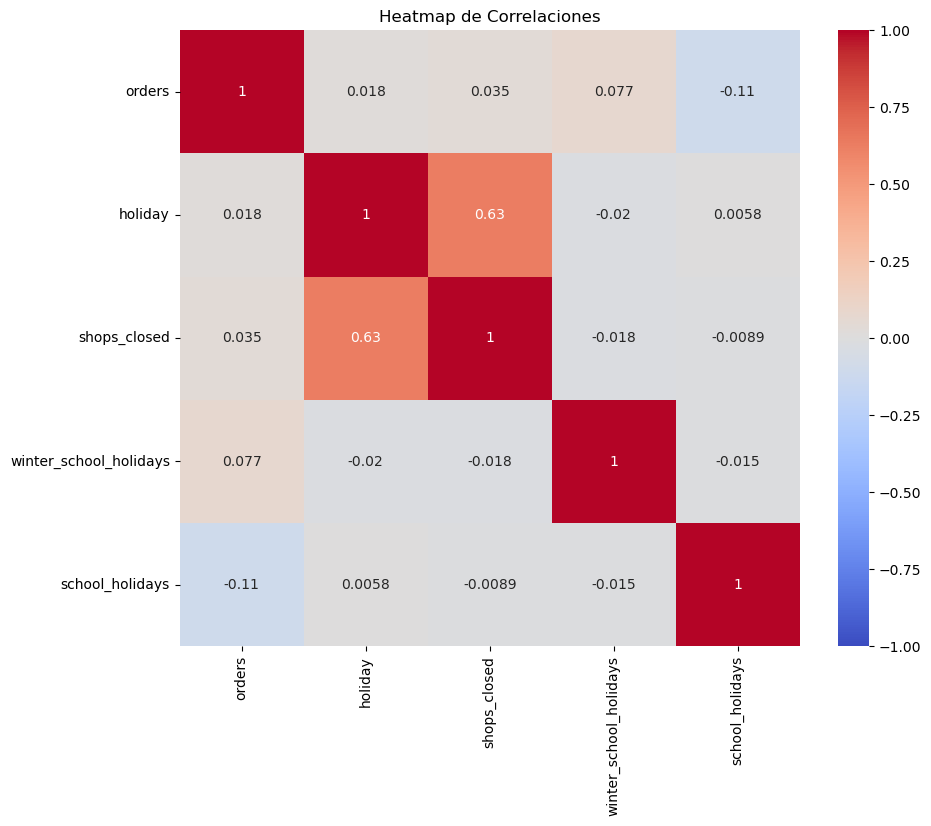

In [78]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

#### Dataset de (no) feriados

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [79]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

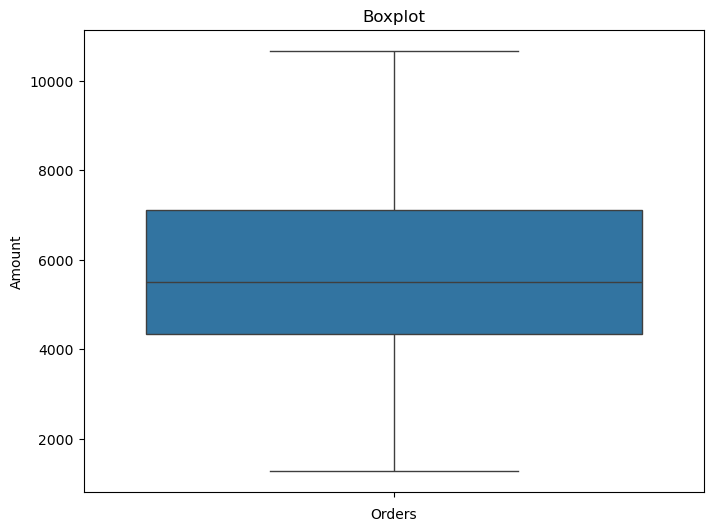

In [80]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

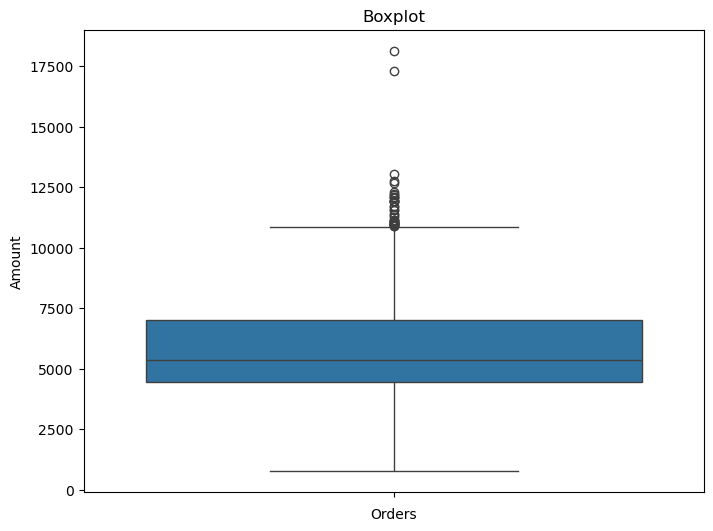

In [81]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

#### Dataset de sucursales

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [82]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_286557/4236548369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_286557/4236548369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [83]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


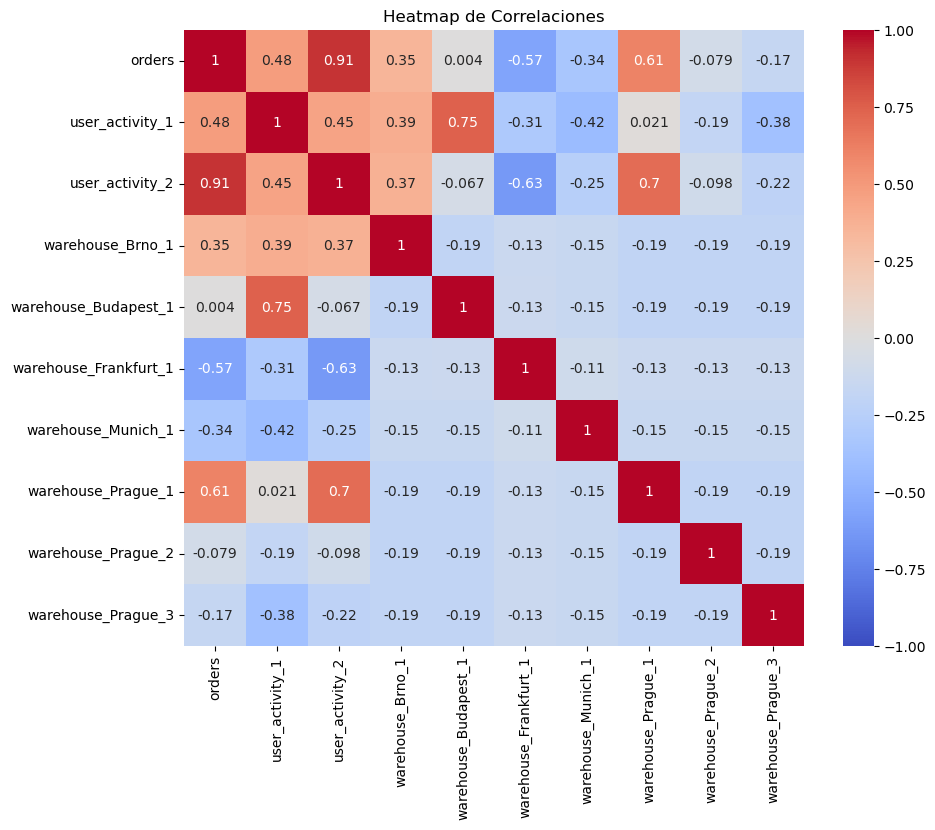

In [84]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [85]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

#### Dataset dias de la semana

Así como debe haber diferencia entre la cantidad de pedidos por día y sucursales en los días feriados y en los no feriados, también debe haberlo entre los días de la semana.

In [86]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [87]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

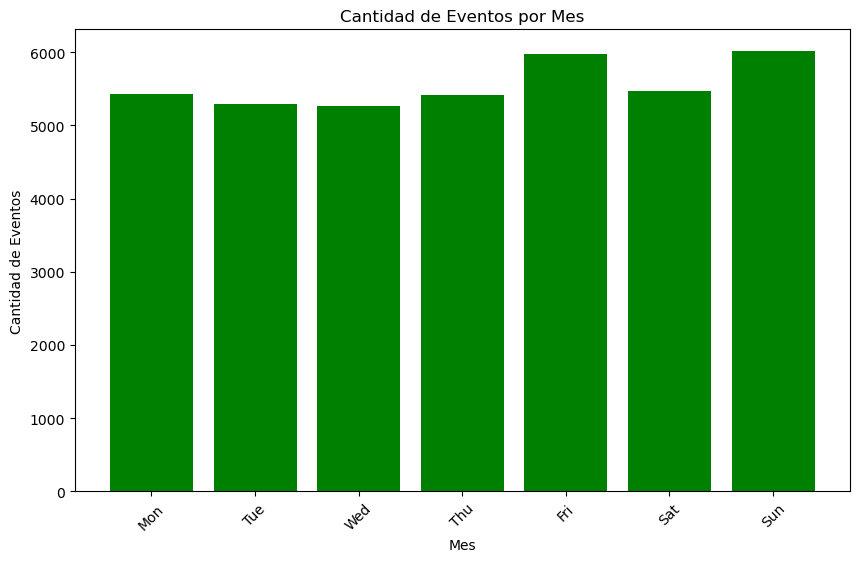

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

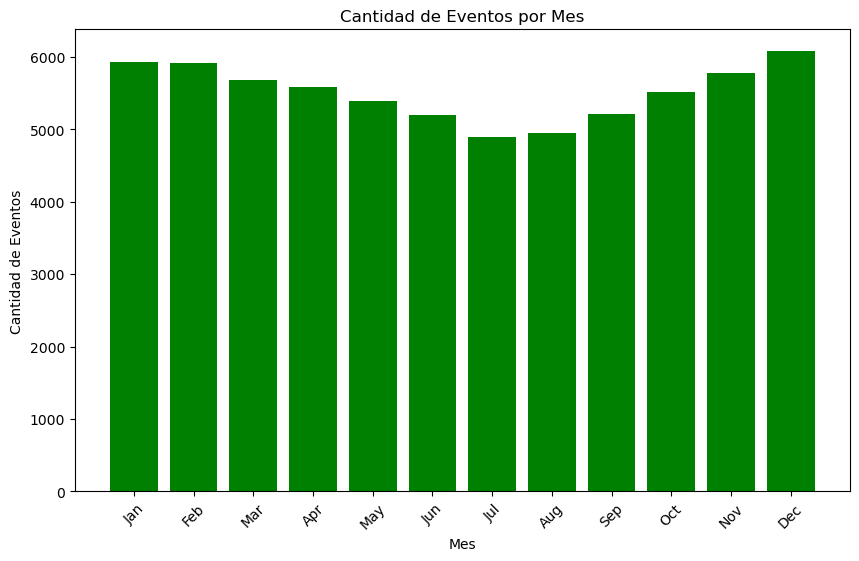

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [90]:
df_season = df_clean.copy()
df_season['fecha'] = pd.to_datetime(df['date'])

In [91]:
df_season["Season"] = df_season.fecha.dt.month_name()

In [92]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [93]:
df_season['Season'] = df_season.Season.apply(get_season)

In [94]:
df_seasons = pd.concat([df_clean['orders'], pd.get_dummies(df_season.Season).astype('int').add_prefix('Season_')], axis=1)

In [95]:
df_seasons

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


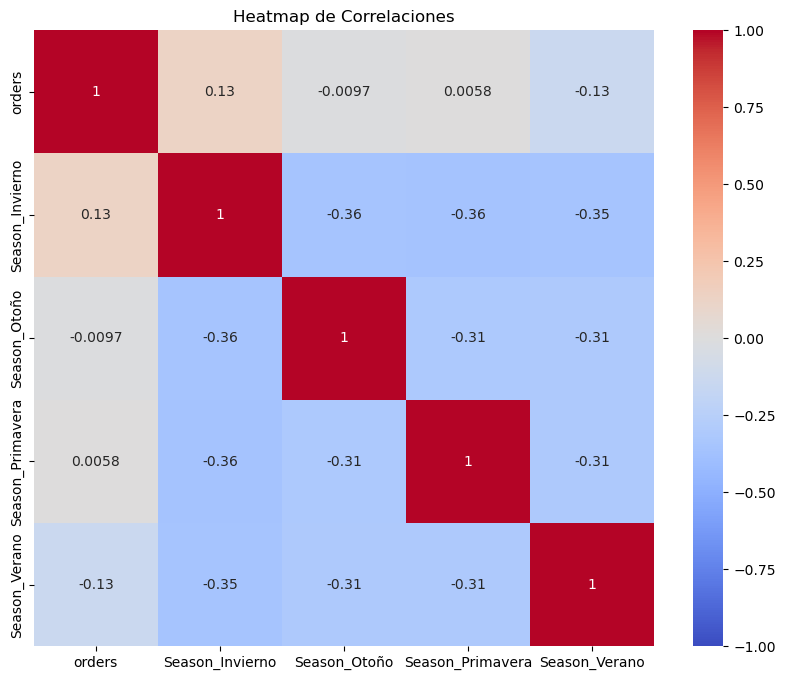

In [96]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [97]:
df_season['Hot'] = df_season.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [98]:
df_season

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,2024-03-13,Primavera,0


In [99]:
df_season.orders.corr(df_season.Hot)

-0.13284735461473357

In [100]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [101]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones

- Nos vamos con Warehouse importantes: warehouse_Brno_1, warehouse_Budapest_1, warehouse_Frankfurt_1, warehouse_Munich_1, warehouse_Prague_1, warehouse_Prague_2	y warehouse_Prague_3
- User activities mucha correlación
- Promedio de User activities por warehouse
- Si la fecha pertenece a temporada de calor. En invierno se encuentran valores mas altos
- School holiday tiene correlacion ""alta"" y holidays no

Columnas finales:
- warehouse_Brno-1 (binaria)
- warehouse_Budapest_1 (binaria)
- warehouse_Frankfurt_1 (bianria)
- warehouse_Munich_1 (binaria)
- warehouse_Prague_1 (binaria)
- warehouse_Prague_2 (binaria)
- warehouse_Prague_3 (binaria)
- Promedio user activities por warehouse (numerica)
- school holiday (binaria)
- Hot season (binaria)

## Feature Engineer

In [102]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'id'], axis = 1)
df_final

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,1722.0,32575.0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,1688.0,32507.0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,1696.0,32552.0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,1681.0,32423.0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,1704.0,32410.0
...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,2983.0,27111.0
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,2975.0,27133.0
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,2974.0,27151.0
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,2979.0,27180.0


In [103]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [104]:
df_final = df_final.sort_values(by = "date")

In [105]:
df_final_label = df_final.orders
df_final = df_final.drop(["orders"], axis=1)

# Separando el DataFrame en 80% y 20%
df_final_train, df_final_validation, df_final_train_label, df_final_validation_label = train_test_split(df_final,
                                                    df_final_label, 
                                                    test_size=0.2,
                                                    shuffle=False)



In [106]:
df_final_train_label = df_final_train_label.reset_index().drop(["index"], axis = 1)
df_final_validation_label = df_final_validation_label.reset_index().drop(["index"], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

In [107]:
warehouses = df_final_train.warehouse

In [108]:
# mean user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
means_ua1= df_usact1.to_dict()

PROMEDIO_UA1 = df_usact1.mean()

# max user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].max()
max_ua1= df_usact1.to_dict()

# min user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].min()
min_ua1= df_usact1.to_dict()

In [109]:
# user activity 2
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

# max user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].max()
max_ua2= df_usact2.to_dict()

# min user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].min()
min_ua2= df_usact2.to_dict()

In [110]:
df_mean_encoding_warehouse = pd.concat([df_final_train, df_final_train_label], axis = 1)[["orders", 'warehouse']]
df_mean_encoding_warehouse = df_mean_encoding_warehouse.groupby("warehouse")["orders"].mean()
PROMEDIO_OPW = df_mean_encoding_warehouse.mean()
means_orders_per_warehouse= df_mean_encoding_warehouse.to_dict()

In [111]:
df_final_train

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,NaN,0,0,0,0,1722.0,32575.0
1,Prague_2,2020-12-05,NaN,0,0,0,0,1317.0,18462.0
2,Prague_3,2020-12-05,NaN,0,0,0,0,964.0,17693.0
3,Budapest_1,2020-12-05,NaN,0,0,0,0,3046.0,17840.0
4,Brno_1,2020-12-05,NaN,0,0,0,0,2332.0,27392.0
...,...,...,...,...,...,...,...,...,...
5867,Prague_1,2023-08-06,NaN,0,0,0,0,1657.0,36209.0
5868,Budapest_1,2023-08-06,NaN,0,0,0,0,2962.0,22432.0
5869,Prague_2,2023-08-06,NaN,0,0,0,0,1287.0,21491.0
5870,Prague_3,2023-08-07,NaN,0,0,0,0,950.0,19482.0


In [112]:
df_final_train['year_month_warehouse'] = df_final_train['date'].dt.month.astype(str) + '_' + df_final_train['warehouse']
df_mean_encoding_year_month_warehouse = pd.concat([df_final_train, df_final_train_label], axis = 1)[["orders", 'year_month_warehouse']]
df_mean_encoding_year_month_warehouse = df_mean_encoding_year_month_warehouse.groupby('year_month_warehouse')["orders"].mean()
PROMEDIO_YMW = df_mean_encoding_year_month_warehouse.mean()
means_y_m_w= df_mean_encoding_year_month_warehouse.to_dict()

In [113]:
means_orders_per_warehouse

{'Brno_1': 7009.977366255144,
 'Budapest_1': 5362.533546325879,
 'Frankfurt_1': 1409.5226244343892,
 'Munich_1': 2901.62292358804,
 'Prague_1': 8261.953703703704,
 'Prague_2': 4982.338477366256,
 'Prague_3': 4576.63309352518}

In [114]:
# #Features relacionadas con la user activity
df_final_train["mean_user_activity_1"] = df_final_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
# df_final_train["mean_user_activity_2"] = df_final_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
# df_final_train["max_user_activity_1"] = df_final_train.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
# df_final_train["max_user_activity_2"] = df_final_train.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
# df_final_train["min_user_activity_1"] = df_final_train.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
# df_final_train["min_user_activity_2"] = df_final_train.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
# df_final_train["product_ua"] = df_final_train["mean_user_activity_1"] * df_final_train["mean_user_activity_2"]


# #Mean encoding
# df_final_train["mean_orders_per_warehouse"] = df_final_train.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
# df_final_train['year_month_warehouse'] = df_final_train['date'].dt.month.astype(str) + '_' + df_final_train['warehouse']
# df_final_train["means_year_month_warehouse"] = df_final_train.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
df_final_train['country'] = df_final_train['warehouse'].map(city_to_country)
df_final_train = pd.concat([df_final_train.drop(["country"], axis=1), pd.get_dummies(df_final_train.country).astype('int').add_prefix('country_')], axis=1)
df_final_train = pd.concat([df_final_train.drop(["warehouse"], axis=1), pd.get_dummies(df_final_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_train = df_final_train.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_train['hot_season'] = df_final_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
df_final_train['year'] = df_final_train['date'].dt.year
df_final_train['month'] = df_final_train['date'].dt.month
df_final_train['week'] = df_final_train['date'].dt.isocalendar().week
df_final_train['day'] = df_final_train['date'].dt.day
df_final_train['day_of_week'] = df_final_train['date'].dt.dayofweek #numero
# df_final_train['day_of_week'] = df_final_train['date'].dt.day_name() #cadena
df_final_train['year_sin'] = np.sin(2 * np.pi * df_final_train['year'])
#df_final_train['year_cos'] = np.cos(2 * np.pi * df_final_train['year'])
#df_final_train['month_sin'] = np.sin(2 * np.pi * df_final_train['month'] / 12) 
df_final_train['month_cos'] = np.cos(2 * np.pi * df_final_train['month'] / 12)
#df_final_train['week_sin'] = np.sin(2 * np.pi * df_final_train['week'] / 53)
df_final_train['week_cos'] = np.cos(2 * np.pi * df_final_train['week'] / 53)
#df_final_train['day_sin'] = np.sin(2 * np.pi * df_final_train['day'] / 31)
#df_final_train['day_cos'] = np.cos(2 * np.pi * df_final_train['day'] / 31)
#df_final_train['day_of_week_sin'] = np.sin(2 * np.pi * df_final_train['day_of_week'] / 7)
#df_final_train['day_of_week_cos'] = np.cos(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train["month_name"] = df_final_train.date.dt.month_name()
df_final_train['season'] = df_final_train.month_name.apply(get_season)
df_final_train = pd.concat([df_final_train, pd.get_dummies(df_final_train.season).astype('int').add_prefix('Season_')], axis=1)
df_final_train['group']=(df_final_train['year']-2020)*48+df_final_train['month']*4+df_final_train['day']//7

#drops
df_final_train = df_final_train.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse', 'user_activity_1', "'user_activity_2'"], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)

df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 5872 non-null   int64  
 1   shops_closed            5872 non-null   int64  
 2   winter_school_holidays  5872 non-null   int64  
 3   school_holidays         5872 non-null   int64  
 4   user_activity_2         5872 non-null   float64
 5   mean_user_activity_1    5872 non-null   float64
 6   country_Czech Republic  5872 non-null   int64  
 7   country_Germany         5872 non-null   int64  
 8   country_Hungary         5872 non-null   int64  
 9   warehouse_Brno_1        5872 non-null   int64  
 10  warehouse_Frankfurt_1   5872 non-null   int64  
 11  warehouse_Munich_1      5872 non-null   int64  
 12  warehouse_Prague_1      5872 non-null   int64  
 13  hot_season              5872 non-null   int64  
 14  year_sin                5872 non-null   

In [115]:
warehouses_validation = df_final_validation.warehouse

In [116]:
# #Features relacionadas con la user activity
df_final_validation["mean_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["mean_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
# df_final_validation["max_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["max_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
# df_final_validation["min_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["min_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
# df_final_validation["product_ua"] = df_final_validation["mean_user_activity_1"] * df_final_validation["mean_user_activity_2"]


# #Mean encoding
# df_final_validation["mean_orders_per_warehouse"] = df_final_validation.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
# df_final_validation['year_month_warehouse'] = df_final_validation['date'].dt.month.astype(str) + '_' + df_final_validation['warehouse']
# df_final_validation["means_year_month_warehouse"] = df_final_validation.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
df_final_validation['country'] = df_final_validation['warehouse'].map(city_to_country)
df_final_validation = pd.concat([df_final_validation.drop(["country"], axis=1), pd.get_dummies(df_final_validation.country).astype('int').add_prefix('country_')], axis=1)
df_final_validation = pd.concat([df_final_validation.drop(["warehouse"], axis=1), pd.get_dummies(df_final_validation.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_validation = df_final_validation.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_validation['hot_season'] = df_final_validation.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
df_final_validation['year'] = df_final_validation['date'].dt.year
df_final_validation['month'] = df_final_validation['date'].dt.month
df_final_validation['week'] = df_final_validation['date'].dt.isocalendar().week
df_final_validation['day'] = df_final_validation['date'].dt.day
df_final_validation['day_of_week'] = df_final_validation['date'].dt.dayofweek #numero
# df_final_validation['day_of_week'] = df_final_validation['date'].dt.day_name() #cadena
df_final_validation['year_sin'] = np.sin(2 * np.pi * df_final_validation['year'])
#df_final_validation['year_cos'] = np.cos(2 * np.pi * df_final_validation['year'])
#df_final_validation['month_sin'] = np.sin(2 * np.pi * df_final_validation['month'] / 12) 
df_final_validation['month_cos'] = np.cos(2 * np.pi * df_final_validation['month'] / 12)
#df_final_validation['week_sin'] = np.sin(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['week_cos'] = np.cos(2 * np.pi * df_final_validation['week'] / 53)
#df_final_validation['day_sin'] = np.sin(2 * np.pi * df_final_validation['day'] / 31)
#df_final_validation['day_cos'] = np.cos(2 * np.pi * df_final_validation['day'] / 31)
#df_final_validation['day_of_week_sin'] = np.sin(2 * np.pi * df_final_validation['day_of_week'] / 7)
#df_final_validation['day_of_week_cos'] = np.cos(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation["month_name"] = df_final_validation.date.dt.month_name()
df_final_validation['season'] = df_final_validation.month_name.apply(get_season)
df_final_validation = pd.concat([df_final_validation, pd.get_dummies(df_final_validation.season).astype('int').add_prefix('Season_')], axis=1)
df_final_validation['group']=(df_final_validation['year']-2020)*48+df_final_validation['month']*4+df_final_validation['day']//7

#drops
df_final_validation = df_final_validation.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'user_activity_1', 'user_activity_2'], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

df_final_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 1468 non-null   int64  
 1   shops_closed            1468 non-null   int64  
 2   winter_school_holidays  1468 non-null   int64  
 3   school_holidays         1468 non-null   int64  
 4   mean_user_activity_1    1468 non-null   float64
 5   country_Czech Republic  1468 non-null   int64  
 6   country_Germany         1468 non-null   int64  
 7   country_Hungary         1468 non-null   int64  
 8   warehouse_Brno_1        1468 non-null   int64  
 9   warehouse_Frankfurt_1   1468 non-null   int64  
 10  warehouse_Munich_1      1468 non-null   int64  
 11  warehouse_Prague_1      1468 non-null   int64  
 12  hot_season              1468 non-null   int64  
 13  year_sin                1468 non-null   float64
 14  month_cos               1468 non-null   

In [117]:
df_for_corr = pd.concat([df_final_train, df_final_train_label], axis = 1).corr()
df_for_corr.orders = df_for_corr.orders.apply(lambda x: abs(x))
top_15_columns = list(df_for_corr.sort_values(by="orders", ascending=False).orders.head(18).index)
top_15_columns.pop(0)

'orders'

In [118]:
pd.concat([df_final_train, df_final_train_label], axis = 1).corr().orders

holiday                   0.023156
shops_closed              0.033567
winter_school_holidays    0.097041
school_holidays          -0.111471
user_activity_2           0.961500
mean_user_activity_1      0.492349
country_Czech Republic    0.568169
country_Germany          -0.700828
country_Hungary          -0.002044
warehouse_Brno_1          0.354374
warehouse_Frankfurt_1    -0.549241
warehouse_Munich_1       -0.405651
warehouse_Prague_1        0.625266
hot_season               -0.065796
year_sin                  0.042197
month_cos                 0.096162
week_cos                  0.124784
Season_Invierno           0.095153
Season_Otoño             -0.023032
Season_Primavera          0.038605
Season_Verano            -0.114145
group                    -0.045335
orders                    1.000000
Name: orders, dtype: float64

In [119]:
features_orders  = df_for_corr.sort_values(by="orders", ascending=False).orders
best_features = list(features_orders[features_orders > 0.1].index)
best_features.pop(0)

'orders'

In [120]:
best_features

['user_activity_2',
 'country_Germany',
 'warehouse_Prague_1',
 'country_Czech Republic',
 'warehouse_Frankfurt_1',
 'mean_user_activity_1',
 'warehouse_Munich_1',
 'warehouse_Brno_1',
 'week_cos',
 'Season_Verano',
 'school_holidays']

In [121]:
df_for_corr.orders

holiday                   0.023156
shops_closed              0.033567
winter_school_holidays    0.097041
school_holidays           0.111471
user_activity_2           0.961500
mean_user_activity_1      0.492349
country_Czech Republic    0.568169
country_Germany           0.700828
country_Hungary           0.002044
warehouse_Brno_1          0.354374
warehouse_Frankfurt_1     0.549241
warehouse_Munich_1        0.405651
warehouse_Prague_1        0.625266
hot_season                0.065796
year_sin                  0.042197
month_cos                 0.096162
week_cos                  0.124784
Season_Invierno           0.095153
Season_Otoño              0.023032
Season_Primavera          0.038605
Season_Verano             0.114145
group                     0.045335
orders                    1.000000
Name: orders, dtype: float64

In [122]:
all_columns = list(df_final_train.columns)

In [123]:
best_features

['user_activity_2',
 'country_Germany',
 'warehouse_Prague_1',
 'country_Czech Republic',
 'warehouse_Frankfurt_1',
 'mean_user_activity_1',
 'warehouse_Munich_1',
 'warehouse_Brno_1',
 'week_cos',
 'Season_Verano',
 'school_holidays']

In [124]:
column_order = best_features

In [125]:
df_final_train

,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_2,mean_user_activity_1,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,month_cos,week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano,group
0,0,0,0,0,32575.0,1673.672840,1,0,0,0,0,0,1,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
1,0,0,0,0,18462.0,1303.776749,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
2,0,0,0,0,17693.0,956.427544,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
3,0,0,0,0,17840.0,2989.895634,0,0,1,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
4,0,0,0,0,27392.0,2324.431070,1,0,0,1,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,0,36209.0,1673.672840,1,0,0,0,0,0,1,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5868,0,0,0,0,22432.0,2989.895634,0,0,1,0,0,0,0,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5869,0,0,0,0,21491.0,1303.776749,1,0,0,0,0,0,0,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5870,0,0,0,0,19482.0,956.427544,1,0,0,0,0,0,0,1,-6.447061e-13,-0.5,-0.794854,0,0,0,1,177


In [126]:
# pred_ua2 = pd.read_csv("pred_ua2.csv")
# df_final_validation["user_activity_2"] = pred_ua22

In [127]:
# Reordenar las columnas del DataFrame según el orden deseado
df_final_train = df_final_train[column_order].round(5)
df_final_validation = df_final_validation[column_order].round(5)

In [128]:
df_final_train.count()

user_activity_2           5872
country_Germany           5872
warehouse_Prague_1        5872
country_Czech Republic    5872
warehouse_Frankfurt_1     5872
mean_user_activity_1      5872
warehouse_Munich_1        5872
warehouse_Brno_1          5872
week_cos                  5872
Season_Verano             5872
school_holidays           5872
dtype: int64

In [1462]:
df_final_validation

,user_activity_2,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,19102.0,0,0,1,0,0,0,-0.79485,1,0
1,26925.0,0,0,1,0,0,1,-0.79485,1,0
2,5845.0,1,0,0,1,0,0,-0.79485,1,0
3,32314.0,0,1,1,0,0,0,-0.79485,1,0
4,19659.0,0,0,0,0,0,0,-0.79485,1,0
...,...,...,...,...,...,...,...,...,...,...
1463,30745.0,0,0,1,0,0,1,0.26359,0,0
1464,19668.0,0,0,1,0,0,0,0.26359,0,0
1465,37788.0,0,1,1,0,0,0,0.26359,0,0
1466,21909.0,0,0,1,0,0,0,0.26359,0,0


## XGboost

In [959]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80, 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}

In [960]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [961]:
# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(df_final_train, df_final_train_label)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [2, 3, 6, 9, 11, 13, 15],
                         'n_estimators': [50, 65, 80, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [967]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_



best_model.fit(df_final_train, df_final_train_label)
# Hacer predicciones en el conjunto de prueba
y_pred = np.round(best_model.predict(df_final_validation))

# Evaluar el rendimiento del modelo
mse = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mejor combinación de hiperparámetros: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 300}
Mean Squared Error: 0.18


In [963]:
pred_xgboost = y_pred

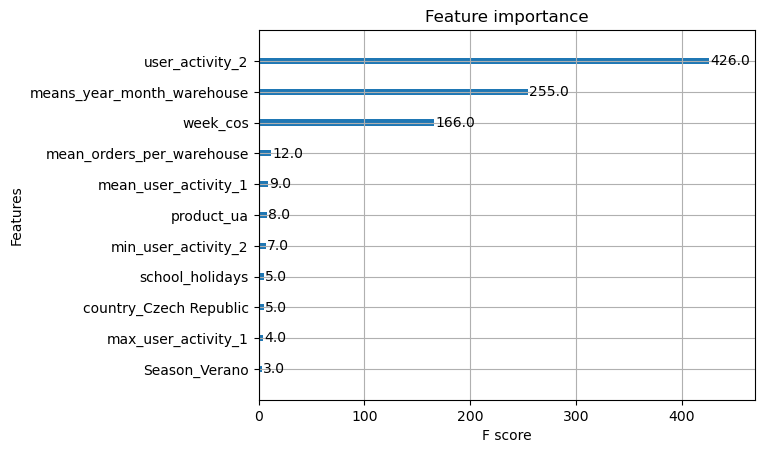

In [968]:
plot_importance(best_model)
plt.show()

In [965]:
list(y_pred)

[4468.0,
 6447.0,
 1380.0,
 7056.0,
 4838.0,
 6447.0,
 1380.0,
 7056.0,
 4468.0,
 4838.0,
 2143.0,
 4237.0,
 7056.0,
 4237.0,
 2143.0,
 6447.0,
 4838.0,
 4468.0,
 1380.0,
 2143.0,
 4838.0,
 7056.0,
 4237.0,
 6447.0,
 1380.0,
 4468.0,
 4237.0,
 2143.0,
 1380.0,
 7056.0,
 4838.0,
 4468.0,
 6447.0,
 6447.0,
 4468.0,
 4237.0,
 7056.0,
 1380.0,
 2143.0,
 4838.0,
 7056.0,
 4838.0,
 6447.0,
 4237.0,
 4468.0,
 1366.0,
 7134.0,
 2163.0,
 4514.0,
 4885.0,
 4291.0,
 6627.0,
 1366.0,
 4291.0,
 4514.0,
 7134.0,
 6627.0,
 4885.0,
 2163.0,
 1366.0,
 4291.0,
 6627.0,
 7134.0,
 4514.0,
 4885.0,
 6627.0,
 2163.0,
 4885.0,
 4291.0,
 4514.0,
 1366.0,
 7134.0,
 6627.0,
 2163.0,
 4885.0,
 4291.0,
 7134.0,
 1366.0,
 4514.0,
 4291.0,
 6627.0,
 2163.0,
 4885.0,
 7134.0,
 1366.0,
 4514.0,
 4514.0,
 7134.0,
 6627.0,
 4291.0,
 1366.0,
 6627.0,
 4514.0,
 7135.0,
 2163.0,
 4291.0,
 4885.0,
 1366.0,
 4885.0,
 7135.0,
 4291.0,
 2163.0,
 4514.0,
 6627.0,
 4514.0,
 6627.0,
 4291.0,
 1366.0,
 2163.0,
 7135.0,
 4885.0,
 

In [966]:
df_final_validation_label

,orders
0,5020.0
1,7319.0
2,1565.0
3,8455.0
4,5607.0
...,...
1463,10777.0
1464,6408.0
1465,11917.0
1466,7140.0


## Redes Neuronales

In [129]:
df_final_train

,user_activity_2,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,mean_user_activity_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,32575.0,0,1,1,0,1673.67284,0,0,0.88966,0,0
1,18462.0,0,0,1,0,1303.77675,0,0,0.88966,0,0
2,17693.0,0,0,1,0,956.42754,0,0,0.88966,0,0
3,17840.0,0,0,0,0,2989.89563,0,0,0.88966,0,0
4,27392.0,0,0,1,0,2324.43107,0,1,0.88966,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5867,36209.0,0,1,1,0,1673.67284,0,0,-0.86104,1,0
5868,22432.0,0,0,0,0,2989.89563,0,0,-0.86104,1,0
5869,21491.0,0,0,1,0,1303.77675,0,0,-0.86104,1,0
5870,19482.0,0,0,1,0,956.42754,0,0,-0.79485,1,0


In [130]:
# Escalar los datos
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_final_train)
df_validation_scaled = scaler.transform(df_final_validation)

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
470/470 - 3s - 6ms/step - loss: 27419724.0000 - val_loss: 13770836.0000
Epoch 2/100
470/470 - 1s - 3ms/step - loss: 3423254.7500 - val_loss: 968056.6875
Epoch 3/100
470/470 - 1s - 2ms/step - loss: 642774.1875 - val_loss: 704501.8750
Epoch 4/100
470/470 - 1s - 2ms/step - loss: 493663.2188 - val_loss: 640890.6875
Epoch 5/100
470/470 - 1s - 3ms/step - loss: 431408.4688 - val_loss: 630904.0000
Epoch 6/100
470/470 - 1s - 3ms/step - loss: 396018.0625 - val_loss: 574203.8125
Epoch 7/100
470/470 - 1s - 3ms/step - loss: 373908.0625 - val_loss: 542881.6875
Epoch 8/100
470/470 - 1s - 3ms/step - loss: 358469.2188 - val_loss: 543722.8750
Epoch 9/100
470/470 - 1s - 3ms/step - loss: 348100.5000 - val_loss: 471622.6875
Epoch 10/100
470/470 - 1s - 3ms/step - loss: 339640.0938 - val_loss: 473775.3750
Epoch 11/100
470/470 - 1s - 3ms/step - loss: 332945.5938 - val_loss: 472135.0938
Epoch 12/100
470/470 - 1s - 3ms/step - loss: 328775.4688 - val_loss: 424110.8438
Epoch 13/100
470/470 - 1s - 2ms/

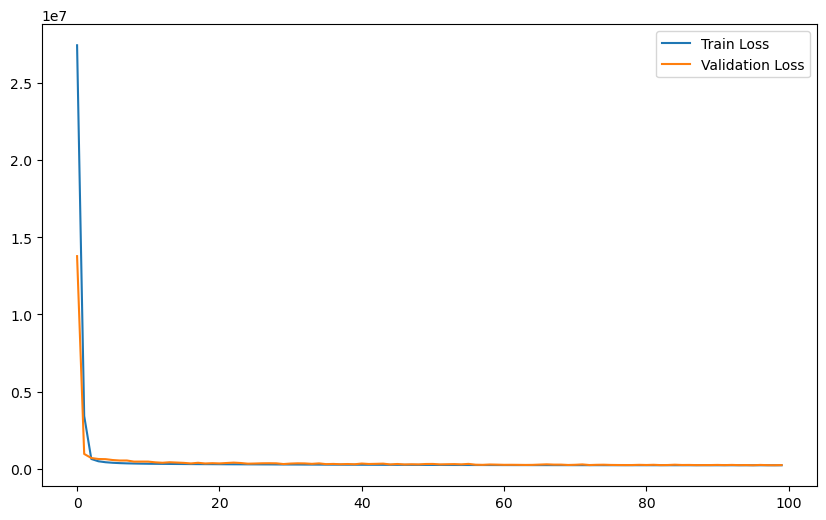

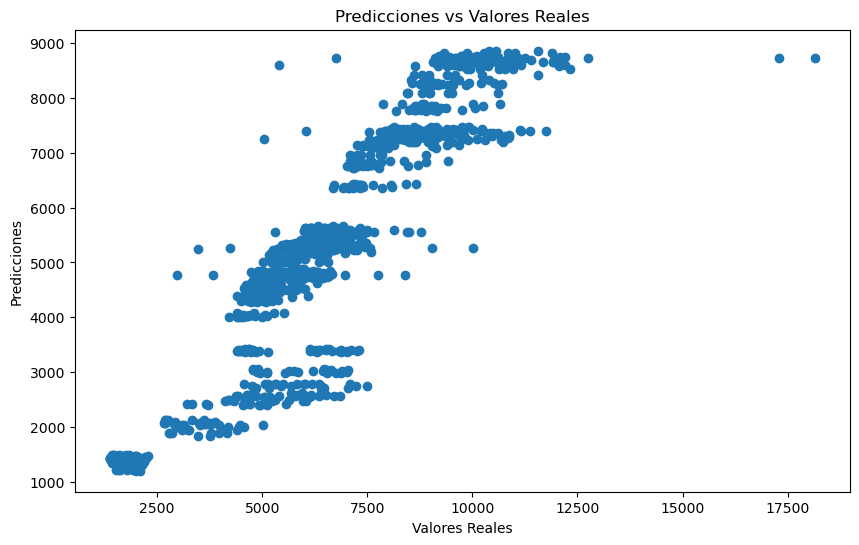

In [131]:
# Crear el modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=df_train_scaled.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

# Compilar el modelo
model_nn.compile(loss='mean_absolute_percentage_error', optimizer='adam')

# Entrenar el modelo
history = model_nn.fit(df_train_scaled, df_final_train_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model_nn.evaluate(df_validation_scaled, df_final_validation_label, verbose=2)
print(f'Test Loss: {loss}')

# Hacer predicciones
y_pred = model_nn.predict(df_validation_scaled)

# Calcular el error
mape = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Test MAPE: {mape}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(df_final_validation_label, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Modelo Stacking

In [132]:
scaler = StandardScaler()
df_final_train = pd.DataFrame(scaler.fit_transform(df_final_train), columns=df_final_train.columns)
df_final_validation = pd.DataFrame(scaler.fit_transform(df_final_validation), columns=df_final_validation.columns)

In [133]:
df_final_train

,user_activity_2,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,mean_user_activity_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,1.146336,-0.465015,2.245251,0.714073,-0.285306,0.032600,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
1,-0.519172,-0.465015,-0.445384,0.714073,-0.285306,-0.442558,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
2,-0.609923,-0.465015,-0.445384,0.714073,-0.285306,-0.888754,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
3,-0.592576,-0.465015,-0.445384,-1.400418,-0.285306,1.723384,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
4,0.534678,-0.465015,-0.445384,0.714073,-0.285306,0.868546,-0.337982,2.245251,1.290365,-0.594921,-0.081769
...,...,...,...,...,...,...,...,...,...,...,...
5867,1.575192,-0.465015,2.245251,0.714073,-0.285306,0.032600,-0.337982,-0.445384,-1.154935,1.680895,-0.081769
5868,-0.050663,-0.465015,-0.445384,-1.400418,-0.285306,1.723384,-0.337982,-0.445384,-1.154935,1.680895,-0.081769
5869,-0.161713,-0.465015,-0.445384,0.714073,-0.285306,-0.442558,-0.337982,-0.445384,-1.154935,1.680895,-0.081769
5870,-0.398799,-0.465015,-0.445384,0.714073,-0.285306,-0.888754,-0.337982,-0.445384,-1.062484,1.680895,-0.081769


In [134]:


model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((df_final_validation.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(df_final_validation)
    test_model2_pred = model2.predict(df_final_validation)
    test_model3_pred = model3.predict(df_final_validation)
    test_model4_pred = model4.predict(df_final_validation)
    test_model5_pred = model5.predict(df_final_validation)
    test_model6_pred = model6.predict(df_final_validation)
    test_model7_pred = model7.predict(df_final_validation)
    test_model8_pred = model8.predict(df_final_validation)
    test_model9_pred = model9.predict(df_final_validation)
    test_model10_pred = model10.predict(df_final_validation)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 11
[LightGBM] [Info] Start training from score 5367.489887


/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052279
0:	learn: 1971.0072627	total: 1.27ms	remaining: 1.27s
1:	learn: 1882.2246898	total: 2.35ms	remaining: 1.17s
2:	learn: 1795.7477176	total: 4.12ms	remaining: 1.37s
3:	learn: 1715.0545920	total: 5.8ms	remaining: 1.44s
4:	learn: 1637.7744895	total: 8.28ms	remaining: 1.65s
5:	learn: 1565.7806618	total: 9.87ms	remaining: 1.63s
6:	learn: 1498.2170562	total: 11ms	remaining: 1.55s
7:	learn: 1433.5107472	total: 12.4ms	remaining: 1.54s
8:	learn: 1372.3779466	total: 13.5ms	remaining: 1.49s
9:	learn: 1315.4619354	total: 14.6ms	remaining: 1.44s
10:	learn: 1260.1131838	total: 15.8ms	remaining: 1.42s
11:	learn: 1208.1017737	total: 16.9ms	remaining: 1.39s
12:	learn: 1159.1203797	total: 18.4ms	remaining: 1.39s
13:	learn: 1112.3083972	total: 19.3ms	remaining: 1.36s
14:	learn: 1069.1441158	total: 20.1ms	remaining: 1.32s
15:	learn: 1029.2984818	total: 20.9ms	remaining: 1.29s
16:	learn: 993.0179889	total: 21.8ms	remaining: 1.26s
17:	learn: 957.9289123	total: 22.5ms	remaining: 1

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052279
0:	learn: 1965.7020842	total: 1.13ms	remaining: 1.13s
1:	learn: 1876.6674527	total: 2.1ms	remaining: 1.05s
2:	learn: 1790.5571630	total: 3.07ms	remaining: 1.02s
3:	learn: 1708.0924122	total: 4.07ms	remaining: 1.01s
4:	learn: 1632.3562554	total: 5.1ms	remaining: 1.01s
5:	learn: 1560.8330946	total: 6.13ms	remaining: 1.01s
6:	learn: 1492.1403858	total: 7.07ms	remaining: 1s
7:	learn: 1428.2124123	total: 7.96ms	remaining: 987ms
8:	learn: 1367.2992297	total: 8.81ms	remaining: 970ms
9:	learn: 1312.0716723	total: 9.4ms	remaining: 931ms
10:	learn: 1257.6359600	total: 10.4ms	remaining: 931ms
11:	learn: 1206.6758230	total: 11.3ms	remaining: 927ms
12:	learn: 1160.9157664	total: 12ms	remaining: 909ms
13:	learn: 1117.0565377	total: 13.2ms	remaining: 928ms
14:	learn: 1074.5937825	total: 15.9ms	remaining: 1.04s
15:	learn: 1033.0018734	total: 17.9ms	remaining: 1.1s
16:	learn: 996.1297190	total: 18.9ms	remaining: 1.09s
17:	learn: 958.1063430	total: 19.9ms	remaining: 1.08s
1

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1959.3532592	total: 975us	remaining: 974ms
1:	learn: 1871.2401013	total: 1.94ms	remaining: 970ms
2:	learn: 1785.6287281	total: 2.88ms	remaining: 956ms
3:	learn: 1705.5724938	total: 3.87ms	remaining: 965ms
4:	learn: 1629.7652516	total: 4.89ms	remaining: 973ms
5:	learn: 1558.5042653	total: 5.91ms	remaining: 979ms
6:	learn: 1490.2838153	total: 6.93ms	remaining: 983ms
7:	learn: 1425.5928099	total: 7.97ms	remaining: 989ms
8:	learn: 1365.5027199	total: 9.03ms	remaining: 995ms
9:	learn: 1307.5068428	total: 10.1ms	remaining: 999ms
10:	learn: 1253.0970926	total: 11.2ms	remaining: 1.01s
11:	learn: 1201.7844846	total: 12.5ms	remaining: 1.03s
12:	learn: 1155.0587907	total: 14ms	remaining: 1.06s
13:	learn: 1108.7743282	total: 15.1ms	remaining: 1.06s
14:	learn: 1066.3065495	total: 16.6ms	remaining: 1.09s
15:	learn: 1028.6908559	total: 17.5ms	remaining: 1.08s
16:	learn: 991.6763660	total: 18.7ms	remaining: 1.08s
17:	learn: 957.8900584	total: 19.9ms	remaining: 1

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1949.5730561	total: 1.97ms	remaining: 1.97s
1:	learn: 1861.7507127	total: 3.13ms	remaining: 1.56s
2:	learn: 1776.2819982	total: 4.33ms	remaining: 1.44s
3:	learn: 1696.2272697	total: 5.55ms	remaining: 1.38s
4:	learn: 1619.7140125	total: 7.14ms	remaining: 1.42s
5:	learn: 1548.6619683	total: 8.36ms	remaining: 1.39s
6:	learn: 1482.0177952	total: 9.53ms	remaining: 1.35s
7:	learn: 1418.2214049	total: 10.5ms	remaining: 1.3s
8:	learn: 1358.0072870	total: 11.5ms	remaining: 1.27s
9:	learn: 1299.6891061	total: 12.5ms	remaining: 1.24s
10:	learn: 1245.1491231	total: 13.5ms	remaining: 1.21s
11:	learn: 1193.3401496	total: 14.5ms	remaining: 1.19s
12:	learn: 1144.6551327	total: 15.5ms	remaining: 1.17s
13:	learn: 1099.7265456	total: 16.2ms	remaining: 1.14s
14:	learn: 1058.3136883	total: 17.2ms	remaining: 1.13s
15:	learn: 1020.7578174	total: 18.1ms	remaining: 1.11s
16:	learn: 983.5623142	total: 19.1ms	remaining: 1.1s
17:	learn: 949.3920382	total: 19.8ms	remaining: 

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1972.7215624	total: 1.63ms	remaining: 1.63s
1:	learn: 1883.8730707	total: 3.16ms	remaining: 1.57s
2:	learn: 1797.6447252	total: 4.37ms	remaining: 1.45s
3:	learn: 1717.0885541	total: 6.83ms	remaining: 1.7s
4:	learn: 1638.8828515	total: 8.08ms	remaining: 1.61s
5:	learn: 1567.1872325	total: 9.22ms	remaining: 1.53s
6:	learn: 1498.0916801	total: 10.2ms	remaining: 1.44s
7:	learn: 1433.0618869	total: 11.1ms	remaining: 1.38s
8:	learn: 1371.8655723	total: 12.2ms	remaining: 1.34s
9:	learn: 1314.9991016	total: 13.5ms	remaining: 1.34s
10:	learn: 1259.6879368	total: 14.5ms	remaining: 1.31s
11:	learn: 1208.5160818	total: 15.4ms	remaining: 1.27s
12:	learn: 1158.5409708	total: 16.4ms	remaining: 1.24s
13:	learn: 1113.3663335	total: 17.2ms	remaining: 1.21s
14:	learn: 1070.5086749	total: 18.1ms	remaining: 1.19s
15:	learn: 1031.4820220	total: 19ms	remaining: 1.17s
16:	learn: 993.9837319	total: 19.9ms	remaining: 1.15s
17:	learn: 959.7248927	total: 20.8ms	remaining: 1

In [135]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

mape = mean_absolute_percentage_error(df_final_validation_label, final_pred)
print(f'Final Model MAPE: {mape:.4f}')

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Final Model MAPE: 0.1638


## Arbol de Regresión

In [969]:
# Spits que respeten la proporción de las clases
kfoldcv = KFold(n_splits=10, shuffle=True, random_state=42)
 
#Creo nuevo arbol
arbolcv=DecisionTreeRegressor()

#Selecciono métrica F1-Score
scorer_fn = make_scorer(mean_squared_error)

#Hago CV
results = cross_validate(arbolcv, df_final_train, df_final_train_label, cv = kfoldcv, scoring = scorer_fn, return_estimator=True)

In [970]:
metricsCV = results['test_score']
best_performance = results['estimator'][np.where(metricsCV == min(metricsCV))[0][0]]
print(metricsCV)

[414257.12032313 372190.88137755 445653.         386583.79386712
 370490.44804089 355312.03449744 557169.28577513 465146.18483816
 441527.6971891  493342.73059814]


In [971]:
#Importancia y reglas del Árbol con mejor Performance
sorted(list(zip(df_final_train.columns.to_list(), best_performance.feature_importances_)), key=lambda x: -x[1])[0:10]      

[('user_activity_2', 0.7529853269664103),
 ('mean_orders_per_warehouse', 0.22695404099355954),
 ('week_cos', 0.01049434550843329),
 ('means_year_month_warehouse', 0.007265809833702479),
 ('max_user_activity_2', 0.000428996777063203),
 ('product_ua', 0.00042753552123674847),
 ('min_user_activity_1', 0.00036278385126870606),
 ('mean_user_activity_2', 0.00029440676722298836),
 ('min_user_activity_2', 0.0002008264994900849),
 ('mean_user_activity_1', 0.0001972113294091473)]

In [972]:
#Predicción sobre el set de evaluacion
y_pred = np.round(best_performance.predict(df_final_validation))

In [973]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1949105.15


In [974]:
mape = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mape:.4f}')

Mean Squared Error: 0.1680


## Train for Warehouse

In [ ]:
df_final_train

In [ ]:
df_final_validation

In [ ]:
warehouses.value_counts()

In [ ]:
warehouses.value_counts()

In [ ]:
unique_warehouses = list(warehouses.unique())
models_warehouses = {}

In [ ]:
df_final_train = df_final_train.drop(["warehouse_Frankfurt_1", "warehouse_Munich_1", "country_Germany", "country_Czech Republic"], axis = 1)
df_final_validation = df_final_validation.drop(["warehouse_Frankfurt_1", "warehouse_Munich_1", "country_Germany", "country_Czech Republic"], axis = 1)

In [ ]:
df_final_train.count()

In [ ]:
# Escalar los datos
unique_warehouses = list(warehouses.unique())
scaler = MinMaxScaler()

df_final_train['warehouse'] = warehouses
df_final_train["orders"] = df_final_train_label
for warehouse in unique_warehouses:
   df_with_unique_warehouse = df_final_train[df_final_train.warehouse == warehouse].drop(['warehouse'], axis = 1)
   df_with_unique_warehouse_label = df_with_unique_warehouse.orders
   df_with_unique_warehouse = df_with_unique_warehouse.drop(['orders'], axis = 1)
   if df_with_unique_warehouse.size == 0:
      if warehouse == 'Budapest_1':
         print("ACA ENTRO BUDAPEST")
      continue
   df_train_scaled_with_unique_warehouse = scaler.fit_transform(df_with_unique_warehouse)
   # Crear el modelo de red neuronal
   model_nn = Sequential()
   model_nn.add(Dense(64, input_dim=df_train_scaled_with_unique_warehouse.shape[1], activation='relu'))
   model_nn.add(Dense(32, activation='relu'))
   model_nn.add(Dense(1))

   # Compilar el modelo
   model_nn.compile(loss='mean_absolute_percentage_error', optimizer='adam')

   # Entrenar el modelo
   history = model_nn.fit(df_train_scaled_with_unique_warehouse, df_with_unique_warehouse_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)
   models_warehouses[warehouse] = model_nn
   
   

In [ ]:
unique_warehouses

In [ ]:
models_warehouses

In [ ]:
results = pd.Series(dtype='float64')

global cont
cont = 0
def predict_by_warehouse(row):
    warehouse = warehouses_validation.iloc[row.name]
    
    model = models_warehouses[warehouse]

    scaled_row = scaler.fit_transform(row.values.reshape(1, -1))
    result = model.predict(scaled_row)

    results.loc[len(results)] = result




In [ ]:
df_final_validation.apply(predict_by_warehouse, axis=1)

In [ ]:
mape = mean_absolute_percentage_error(df_final_validation_label, results)
print(f'Test MAPE: {mape}')

## Submission

In [ ]:
# Generamos un dataframe del dataset de entrenamiento
test =  pd.read_csv('test.csv')
test

In [ ]:
test['date'] = pd.to_datetime(test['date'])
test["mean_user_activity_1"] = test.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
test["mean_user_activity_2"] = test.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
test["max_user_activity_1"] = test.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
test["max_user_activity_2"] = test.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
test["min_user_activity_1"] = test.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
test["min_user_activity_2"] = test.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
test["product_ua"] = test["mean_user_activity_1"] * test["mean_user_activity_2"]
# test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))

#Mean encoding
test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
test['year_month_warehouse'] = test['date'].dt.month.astype(str) + '_' + test['warehouse']
test["means_year_month_warehouse"] = test.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

test['country'] = test['warehouse'].map(city_to_country)
test = pd.concat([test.drop(["country"], axis=1), pd.get_dummies(test.country).astype('int').add_prefix('country_')], axis=1)
test = pd.concat([test.drop(["warehouse"], axis=1), pd.get_dummies(test.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
test = test.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
test['hot_season'] = test.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek #numero
# test['day_of_week'] = test['date'].dt.day_name() #cadena
test['year_sin'] = np.sin(2 * np.pi * test['year'])
test['year_cos'] = np.cos(2 * np.pi * test['year'])
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12) 
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)
test['week_sin'] = np.sin(2 * np.pi * test['week'] / 53)
test['week_cos'] = np.cos(2 * np.pi * test['week'] / 53)
test['day_sin'] = np.sin(2 * np.pi * test['day'] / 31)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 31)
test['day_of_week_sin'] = np.sin(2 * np.pi * test['day_of_week'] / 7)
test['day_of_week_cos'] = np.cos(2 * np.pi * test['day_of_week'] / 7)
test["month_name"] = test.date.dt.month_name()
test['season'] = test.month_name.apply(get_season)
test = pd.concat([test, pd.get_dummies(test.season).astype('int').add_prefix('Season_')], axis=1) # tiene solo primavera
test['Season_Invierno'] = 0
test['Season_Verano'] = 0

test['group']=(test['year']-2020)*48+test['month']*4+test['day']//7

test = test.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse'], axis = 1)
test = test.reset_index().drop(["index"], axis = 1)

test.info()

In [ ]:
ids = test.id
test = test.drop(["id"], axis=1)

In [ ]:
df_final_train.columns

In [ ]:
test = test[df_final_train.columns]

In [ ]:
test

In [ ]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((test.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(test)
    test_model2_pred = model2.predict(test)
    test_model3_pred = model3.predict(test)
    test_model4_pred = model4.predict(test)
    test_model5_pred = model5.predict(test)
    test_model6_pred = model6.predict(test)
    test_model7_pred = model7.predict(test)
    test_model8_pred = model8.predict(test)
    test_model9_pred = model9.predict(test)
    test_model10_pred = model10.predict(test)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [ ]:
# Redes Neuronales
test_scaled = scaler.transform(test)
final_pred = [value[0] for value in model_nn.predict(test_scaled)]

In [ ]:
list(final_pred)

In [ ]:
sub = pd.DataFrame({
    'id': ids,
    'orders': final_pred
})

In [ ]:
sub

In [ ]:
# Escribir el DataFrame a un archivo CSV
sub.to_csv('submission_nn.csv', index=False)
